# Self Organizing Maps

## Import the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [42]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


# Feature Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [48]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len= 15, sigma=1.0, learning_rate= 0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)


## Visualizing the results

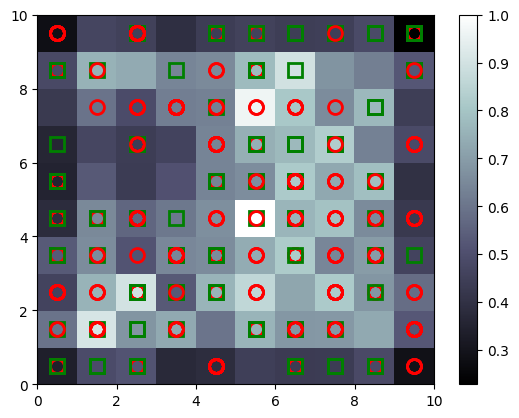

In [49]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5, 
        w[1] + 0.5, 
        markers[y[i]], 
        markeredgecolor=colors[y[i]], 
        markerfacecolor = 'None', 
        markersize=10, 
        markeredgewidth=2
    )
    
show()

## Finding the frauds

In [51]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1, 1)] , mappings[(5, 4)]), axis=0)

print(frauds)

[[1.71710134e-01 0.00000000e+00 2.50676692e-01 4.91071429e-02
  5.00000000e-01 6.15384615e-01 8.75000000e-01 1.40350877e-03
  0.00000000e+00 1.00000000e+00 4.47761194e-02 0.00000000e+00
  5.00000000e-01 0.00000000e+00 3.30000000e-04]
 [6.17573450e-01 0.00000000e+00 3.22105263e-01 1.33928571e-01
  5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 8.95522388e-02 0.00000000e+00
  5.00000000e-01 0.00000000e+00 2.00000000e-03]
 [7.82624365e-01 0.00000000e+00 4.13533835e-02 4.46428571e-02
  5.00000000e-01 7.69230769e-01 3.75000000e-01 8.77192982e-03
  0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00
  5.00000000e-01 5.40000000e-02 9.80000000e-04]
 [5.84745865e-01 0.00000000e+00 1.39097744e-01 6.55357143e-02
  5.00000000e-01 3.07692308e-01 2.50000000e-01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00
  5.00000000e-01 1.00000000e-01 5.30000000e-04]
 [7.84926861e-01 0.00000000e+00 3.50375940e-02 1.19642857e-02
  

In [52]:
frauds = sc.inverse_transform(frauds)

In [53]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5719940e+07, 0.0000000e+00, 3.5170000e+01, 3.7500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.0100000e+02],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [56]:
# this is one of the cheaters
result = dataset.loc[dataset["CustomerID"] == 15608595]
result

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
71,15608595,0,30.42,1.375,2,9,8,0.04,0,1,3,0,2,0,34,0
